<AxesSubplot:xlabel='Month'>

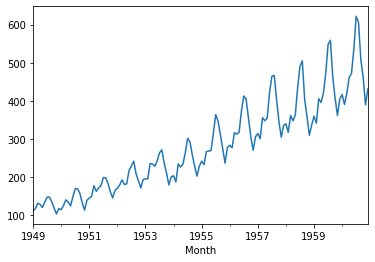

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

# 月毎の旅客機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], infer_datetime_format=True)
y = pd.Series(df_content['#Passengers'].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82681D+00    |proj g|=  4.34533D-01

At iterate    5    f=  4.62140D+00    |proj g|=  4.29316D-02

At iterate   10    f=  4.60468D+00    |proj g|=  1.07767D-02

At iterate   15    f=  4.60467D+00    |proj g|=  2.34466D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  4.60370D+00    |proj g|=  3.70031D-02

At iterate   25    f=  4.60216D+00    |proj g|=  2.66099D-02

At iterate   30    f=  4.60036D+00    |proj g|=  2.71323D-02

At iterate   35    f=  4.59203D+00    |proj g|=  8.27543D-02

At iterate   40    f=  4.58880D+00    |proj g|=  9.61551D-03

At iterate   45    f=  4.58819D+00    |proj g|=  2.14666D-02

At iterate   50    f=  4.58528D+00    |proj g|=  2.99132D-02
  ys=-3.593E-03  -gs= 2.912E-03 BFGS update SKIPPED

At iterate   55    f=  4.58220D+00    |proj g|=  1.27155D-02

At iterate   60    f=  4.58217D+00    |proj g|=  1.34303D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:491: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<BarContainer object of 119 artists>

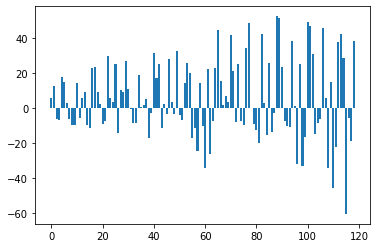

In [7]:
from statsmodels.tsa.arima_model import ARIMA

y120 = y[:120]
# 階差を取らないモデル
model_d0 = ARIMA(y120, (3, 0, 2))
result_d0 = model_d0.fit()
res_d0 = result_d0.resid

# 残差の出力
plt.bar(range(len(res_d0[1:])), res_d0[1:])

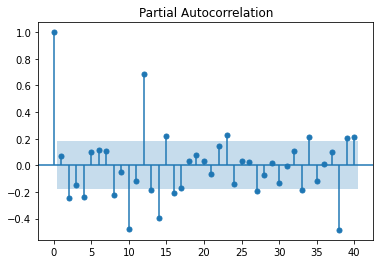

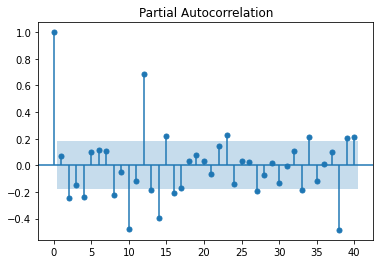

In [8]:
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res_d0[1:], lags=40)

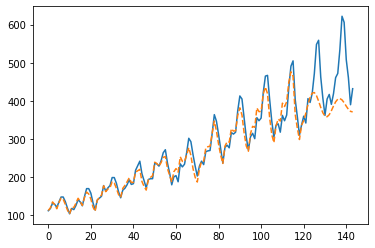

In [9]:
# 原系列
plt.plot(y.values, label='observation')

# 学習に使ったサンプルデータと
# ARUNA(3, 0, 2)の予測値を含めた系列の表示
plt.plot(result_d0.predict(1, len(y)).values, '--', label='forecast')


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56261D+00    |proj g|=  5.57586D-02

At iterate    5    f=  4.55941D+00    |proj g|=  3.74811D-05

At iterate   10    f=  4.55941D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   0.000D+00   4.559D+00
  F =   4.5594134850590313     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<BarContainer object of 119 artists>

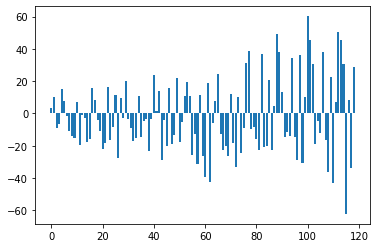

In [10]:
# 階差１をとったモデル（p=4, d=1, q=1）
model_d1 = ARIMA(y120, (4, 1, 1))
result_d1 = model_d1.fit()
res_d1 = result_d1.resid
# 残差の出力
plt.bar(range(len(res_d1)), res_d1)

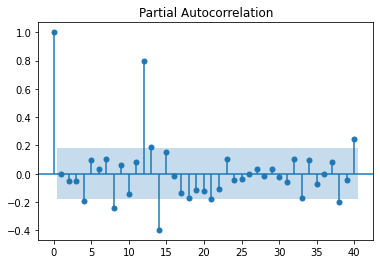

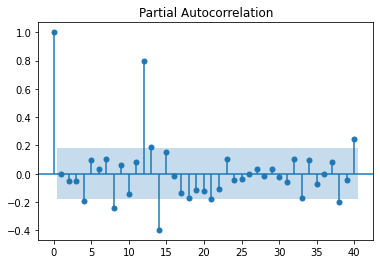

In [11]:
tsaplots.plot_pacf(res_d1, lags=40)

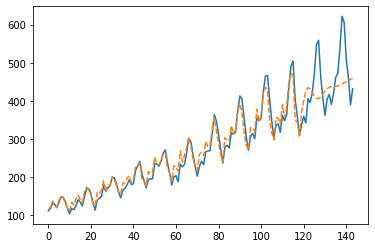

In [12]:
# 原系列
plt.plot(y.values, label='observation')

# 学習に使ったサンプルデータと
# ARUNA(3, 0, 2)の予測値を含めた系列の表示
plt.plot(result_d1.predict(1, len(y), typ='levels').values, '--', label='forecast')